In [1]:
# import tools for data manipulation
import pandas as pd
import numpy as np

#visualisation tools
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

#set font size
plt.rcParams['font.size']=25

#setting figure size
from IPython.core.pylabtools import figsize

#splitting test and train data
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',70)

# data cleaning and formating

In [2]:
energy = pd.read_csv('energy_data.csv')

In [3]:
print(energy.shape,'\n')#11746 rows and 60 columns
print(energy.info())#check for missing values

(11746, 60) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                            

In [4]:
energy.head(15)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [5]:
#covert the data types
energy =energy.replace({'Not Available':np.nan})

#find columns that should be numeric and convert to float data type

for col in list(energy.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
            energy[col]=energy[col].astype(float)

In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [7]:
# summary statistics upon success
energy.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [8]:
def missing_values_table_info(df):
    #number of null elements in the dataframe
    missing_vals=df.isnull().sum()
    
    #percantage of null elements
    missing_vals_percentage=100*missing_vals/len(df)
    
    #make a table of missing values
    missing_values_table=pd.concat([missing_vals,missing_vals_percentage],axis=1)
    
    #rename the columns
    missing_vals_rename_cols=missing_values_table.rename(columns={0:'missing values',1:'% of total'})
    
    #sort the dataframe in descending order by percentage of mising values
    missing_vals_rename_cols=missing_vals_rename_cols[
        missing_vals_rename_cols.iloc[:,1]!=0].sort_values('% of total',ascending=False).round(1)
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(missing_vals_rename_cols.shape[0]) +
            " columns that have missing values.")
    #return column with missing information
    return  missing_vals_rename_cols    

In [9]:
missing_values_table_info(energy)

The dataset has 60 columns.
There are 46 columns that have missing values.


,missing values,% of total
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [10]:
#find columns with 50% of their data so as to discard them.
# this is because such columns may not be useful in our analysis
missing_df=missing_values_table_info(energy)
missing_columns=list(missing_df[missing_df['% of total']>50].index)
print('number of columns removed are {}'.format(len(missing_columns)))

The dataset has 60 columns.
There are 46 columns that have missing values.
number of columns removed are 11


In [11]:
#drop the columns
energy=energy.drop(columns=missing_columns,axis=1)

In [12]:
#check everything worked out
missing_values_table_info(energy)

The dataset has 49 columns.
There are 35 columns that have missing values.


,missing values,% of total
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


# EDA 
1.to check for anomalies
2.correlation of features to each other and to the target
3.patterns and trends

Text(0.5,1,'score distribution')

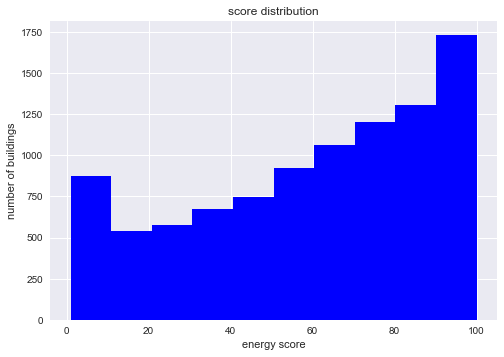

In [13]:
#first focus on the target, which is the energy_score
figsize(10,10)
#rename the column
energy=energy.rename(columns={'ENERGY STAR Score':'score'})

#histogram of this score

plt.style.use('seaborn')
plt.hist(energy['score'].dropna(),color='blue')
plt.xlabel('energy score')
plt.ylabel('number of buildings');plt.title('score distribution')

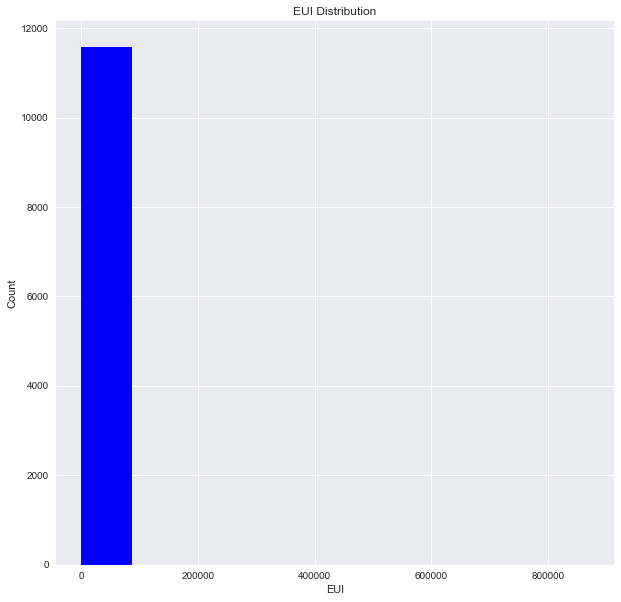

In [14]:
#the anomalies are that an unusual number of managers reported 100% efficiency
#while some reported 0% efficiency. this may be a sign of total honesty or just plain lies
#using the energy use intensity which is unreported we can be able to show things clearly

figsize(10, 10)
plt.hist(energy['Site EUI (kBtu/ft²)'].dropna(), color = 'blue');
plt.xlabel('EUI'); 
plt.ylabel('Count'); plt.title('EUI Distribution');

In [15]:
# we have outliers and we should explore them a bit more
energy['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
energy['Site EUI (kBtu/ft²)'].dropna().sort_values().head()

11391    0.0
26       0.0
25       0.0
136      0.0
137      0.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [17]:
energy['Site EUI (kBtu/ft²)'].dropna().sort_values().tail()

8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [18]:
energy[energy['Site EUI (kBtu/ft²)']==869265.000000]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [19]:
# on the low end an extreme outlier is below 1st quartile - 3*interquatile range
# on the high end an extreme outlier is above 3rd quartile + 3*interquatile range

#find the quartiles
first_q =energy['Site EUI (kBtu/ft²)'].describe()['25%']
upper_q= energy['Site EUI (kBtu/ft²)'].describe()['75%']
#interquartile range
iqr=upper_q - first_q
                
# remove outliers
energy=energy[(energy['Site EUI (kBtu/ft²)']>(first_q-3* iqr)) & 
              (energy['Site EUI (kBtu/ft²)'] < (upper_q + 3 * iqr))] 

Text(0.5,1,'score distribution')

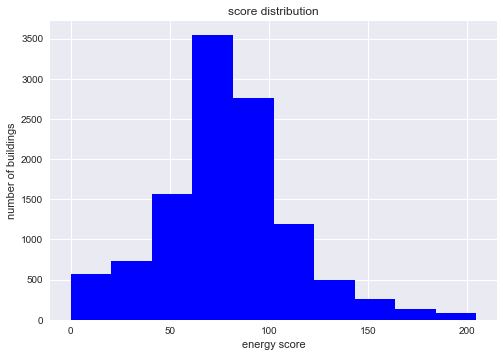

In [20]:
#histogram of this score
figsize(7,7)
plt.style.use('seaborn')
plt.hist(energy['Site EUI (kBtu/ft²)'].dropna(),color='blue')
plt.xlabel('energy score')
plt.ylabel('number of buildings');plt.title('score distribution')

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


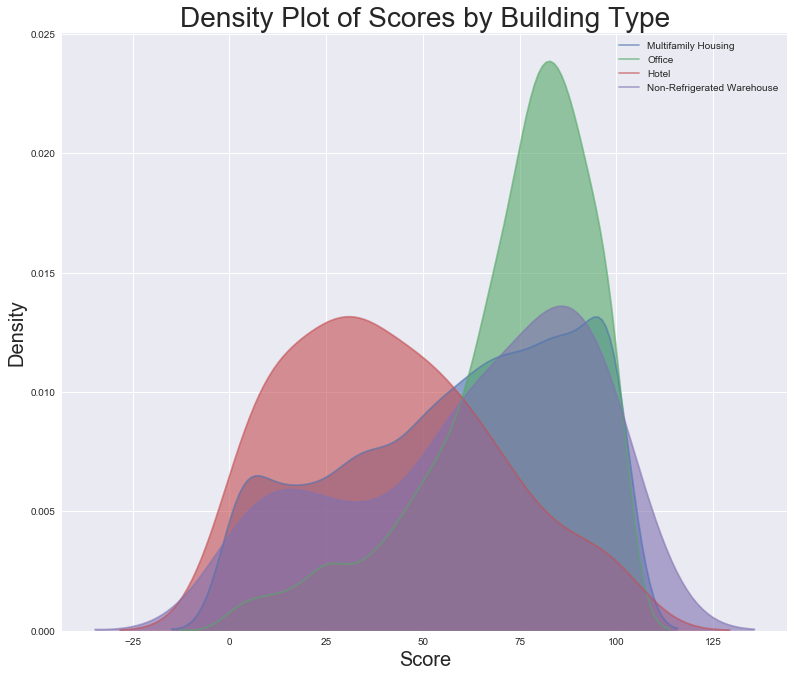

In [21]:
#outliers have been removed and the skewness to the left eliminated.
#histogram now shows a uniform distrinution

# now investigate correlation between score and categorical features in the data. i.e building type
# end goal is to find out which features have a high correlation coefficient to energy score
# use a density plot. use buildings with more than 100 observatiions in the data so as not to clutter the image

# list of building types with more than 100 observations
types=energy.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types=list(types[types.values>100].index)

#plot the density plot
figsize(13,11)

for building_type in types:
    subset=energy[energy['Largest Property Use Type']==building_type]
    #kde plot
    sns.kdeplot(subset['score'].dropna(),label=building_type,alpha=0.6,shade=True)
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Scores by Building Type', size = 28);

In [24]:
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


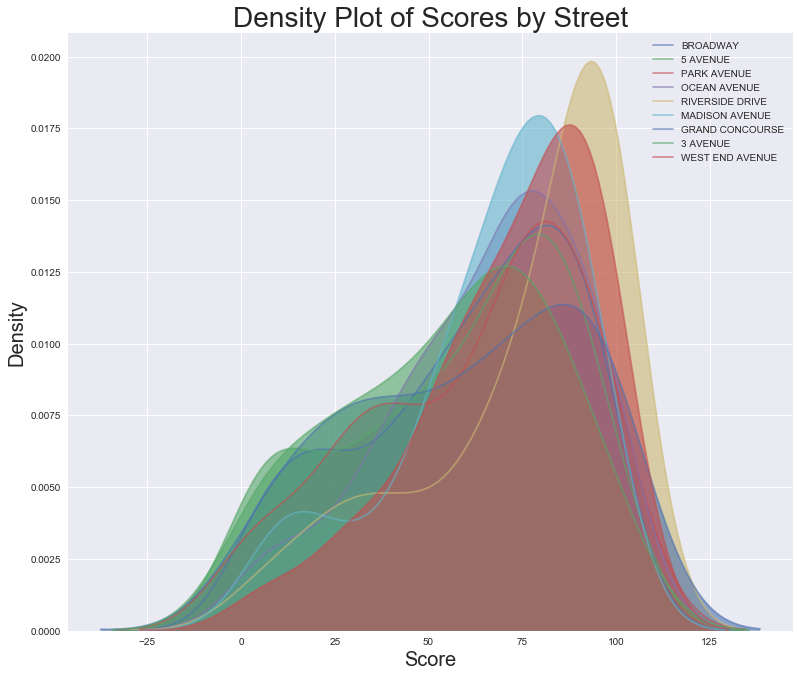

In [85]:
#from above feature we can see that use type has effect on score
#the feature is to be included in an ml model training thus hot encoding it is neccessary

#to investigate another feature. this time we'll use streets and correlation to score. code is similar to above one

streets=energy.dropna(subset=['score'])
streets=streets['Street Name'].value_counts()
streets=list(streets[streets.values>100].index)

for street in streets:
    subset=energy[energy['Street Name']==street]
    #kde plot
    sns.kdeplot(subset['score'].dropna(),label=street,alpha=0.6,shade=True)
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Scores by Street', size = 28);

# there's some influence from street although not as much
# on to the last categorical variable now

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


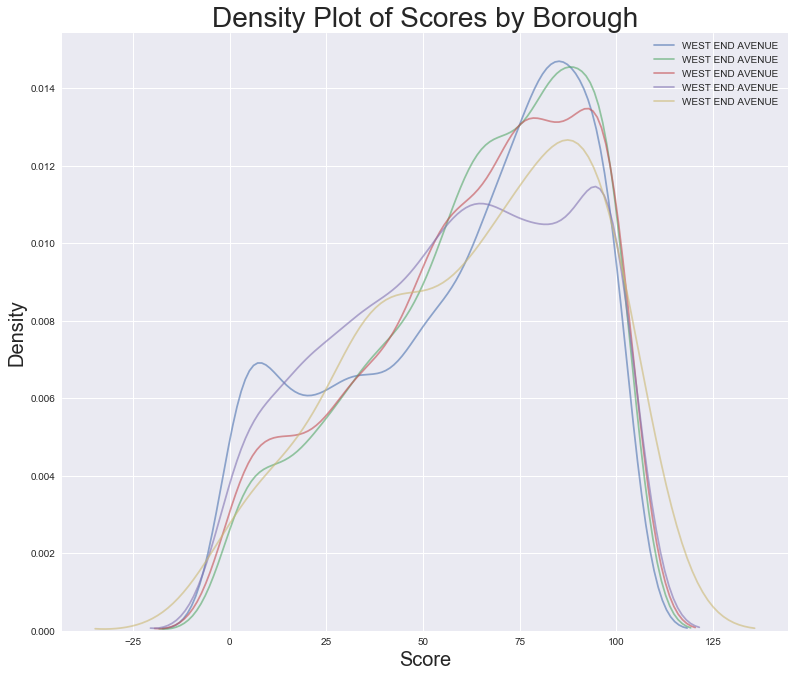

In [86]:
# by borough(administrative centers like city wards suburbs in other areas)
boroughs=energy.dropna(subset=['score'])
boroughs=boroughs['Borough'].value_counts()
boroughs=list(boroughs[boroughs.values>100].index)

for borough in boroughs:
    subset=energy[energy['Borough']==borough]
    #kde plot
    sns.kdeplot(subset['score'].dropna(),label=street,alpha=0.6,shade=False)
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Scores by Borough', size = 28);

In [87]:
#now to find the pearson correlation coefficient of features with the score
correlation=energy.corr()['score'].sort_values()
#most negative correlations
print(correlation.head(10),'\n')
#most positive correlations
print(correlation.tail(10),'\n')

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: score, dtype: float64 

Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property

In [88]:
# Select the numeric columns
numeric_subset = energy.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = energy[['Borough', 'Street Name', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without a score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations_data = features.corr()['score'].dropna().sort_values()

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


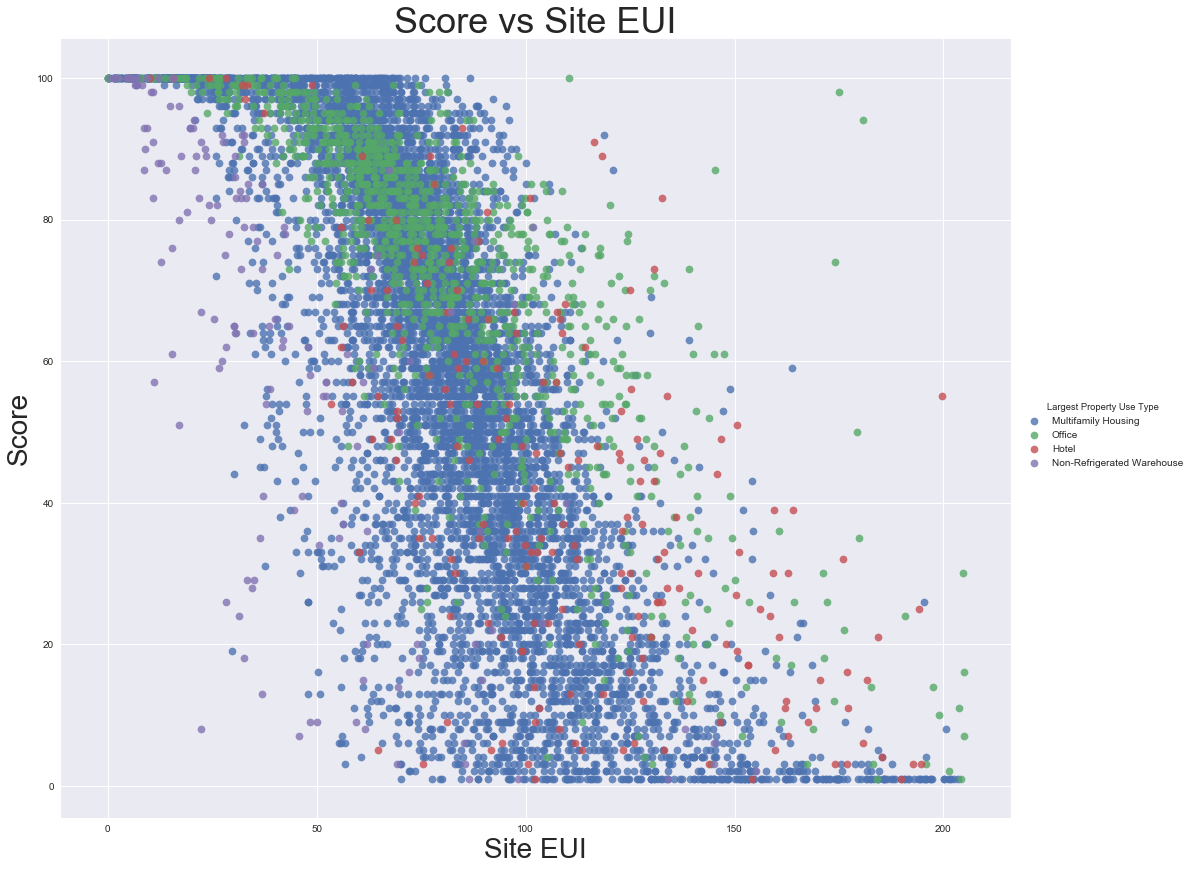

In [89]:
#let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). 
#We can color the graph by the building type to show how that affects the relationship. We will use a scatter plot

figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = energy.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Score', size = 28)
plt.title('Score vs Site EUI', size = 36);

#There is a clear negative relationship between the Site EUI and the score

## feature selection and engineering
 -select two categorical features and the numeric features.
 
 -one hot encode the categorical features 
 
 -remove collinear features

In [90]:
#We select the numeric features, adds in log transformations of all the numeric features, 
#selects and one-hot encodes the categorical features, and joins the sets of features together. 

# Copy the original data
features = energy.copy()

# Select the numeric columns
numeric_subset = energy.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = energy[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape #We result to have 11,319 buildings and 110 columns with score inclusive.

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


(11319, 110)

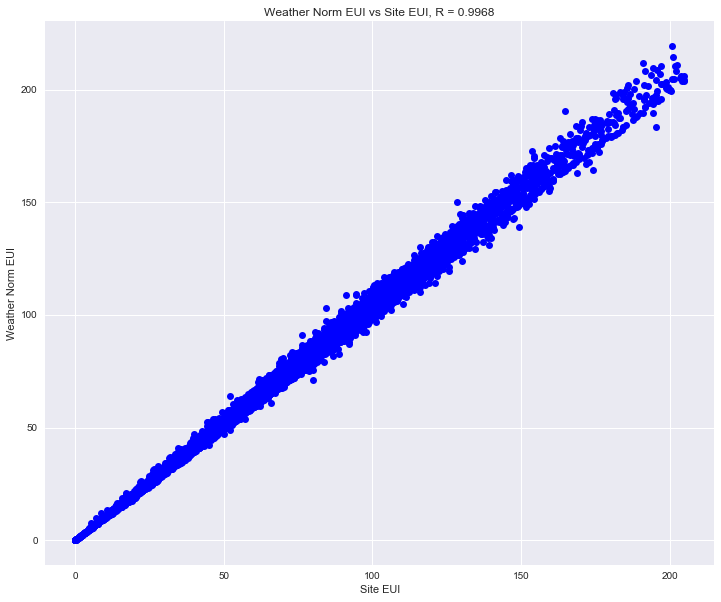

In [91]:
#not all feature are important
#several are highly correlated and therefore redundant. let's remove those
plot_data = energy[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(energy[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [92]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [93]:
# Remove the collinear features above a specified correlation coefficient in this case 0.6
features = remove_collinear_features(features, 0.6);

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [94]:
#drop all columns with na values
features = features.dropna(axis=1,how='all')
features.shape

(11319, 65)

In [95]:
#extract buildings with scores and those without scores
no_score=features[features['score'].isnull()]
with_score=features[features['score'].notnull()]

print(no_score.shape)
print(with_score.shape)

(1858, 65)
(9461, 65)


In [128]:
#separate the features and targets
features=with_score.drop('score',axis=1)
target= pd.DataFrame(with_score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

#separate train and test data
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3)

In [129]:
#Saving Data

# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X_train.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y_train.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

## machine learning

In [130]:
#Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

#ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [131]:
# Reading in the data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [132]:
#ml algorithms have a hard time understanding missing values
#in this step imputation is done to deal with the rest of the missing values(as we had dealt with some above)

#an imputter with a median filling strategy is applied here
imputer=Imputer(strategy='median')

imputer.fit(train_features)

#transforming training and testing features
X_train=imputer.transform(train_features)
X_test=imputer.transform(test_features)

print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [133]:
#Making sure all values are finite
print (np.where(~np.isfinite(X_train)))
print (np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [134]:
#normalize the data so that different algorithms perform optimally
#Creating a scaler object with a range of 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))

#Fit on the training data
scaler.fit(X_train)

#Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Converting y to one-dimensional array
y_train = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [135]:
#Training, testing and evaluating a model
def train_test_evaluate(model):
    
    #Train
    model.fit(X_train,y_train)
    
    #Test
    model_pred = model.predict(X_test)
    
    #Evaluate
    model_mae = mae(y_test, model_pred)
    
    #Return performance metric
    return model_mae

In [136]:
#Linear Regression
lr = LinearRegression()

lr_mae = train_test_evaluate(lr)

print ('Linear Regression Mean Absolute Error: %0.4f' %lr_mae, '\n')

#Support Vector Machines
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = train_test_evaluate(svm)

print ('SVM Mean Absolute Error: %0.4f' %svm_mae, '\n')

#Random Forest
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = train_test_evaluate(random_forest)

print ('Random Forest Mean Absolute Error: %0.4f' %random_forest_mae, '\n')

#Gradient Boosted Machines
gradient_boosted = GradientBoostingRegressor(random_state = 60)
gradient_boosted_mae = train_test_evaluate(gradient_boosted)

print ('Gradient Boosted Regression Mean Absolute Error: %0.4f' %gradient_boosted_mae, '\n')

#K-Nearest Neighbours                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = train_test_evaluate(knn)

print ('K Nearest Neighbors Mean Absolute Error: %0.4f' %knn_mae)

Linear Regression Mean Absolute Error: 13.3158 

SVM Mean Absolute Error: 11.0848 

Random Forest Mean Absolute Error: 9.5361 

Gradient Boosted Regression Mean Absolute Error: 9.7660 

K Nearest Neighbors Mean Absolute Error: 12.3541


Text(0.5,1,'Model Comparison on Test MAE')

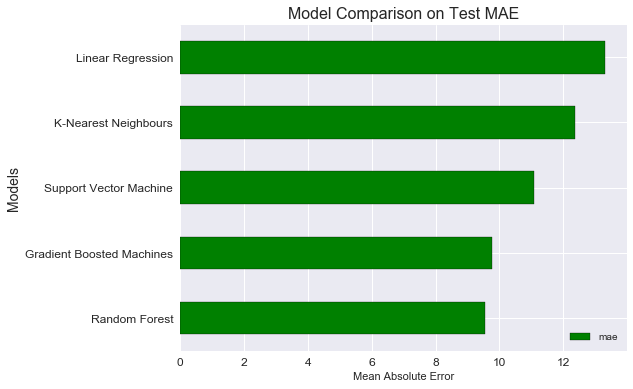

In [140]:
plt.style.use('seaborn')
figsize(8, 6)

#A dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'Support Vector Machine', 
                                           'Random Forest', 
                                           'Gradient Boosted Machines', 'K-Nearest Neighbours'],
                                'mae': [lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae]})

#Horizontal bar chart of MAE
model_comparison.sort_values('mae', ascending = True).plot(x = 'model', 
                                                           y = 'mae', 
                                                           kind = 'barh', 
                                                           color = 'green', 
                                                           edgecolor = 'black')

#Plot formatting
plt.ylabel('Models', size = 14) 
plt.yticks(size = 12)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test MAE', size = 16)

#We can see that there is a use for ML because all the models significantly outperform the baseline.

In [138]:
#next time we'll continue on model optimisation